Get the data and set up the connection from the data base in SQL 

In [3]:
import toml
import os
import pandas as pd 
from sqlalchemy import create_engine

secrets_path = os.path.join("..", "..", ".streamlit", "secrets.toml")
secrets = toml.load(secrets_path)
db_token = secrets["connections"]["databricks"]["access_token"]
server_hostname = secrets["connections"]["databricks"]["server_hostname"]
http_path = secrets["connections"]["databricks"]["http_path"]
catalog_name = "hive_metastore" 
schema_name = "default"

connection_url = (
    f"databricks://token:{db_token}@{server_hostname}?"
    f"http_path={http_path}&catalog={catalog_name}&schema={schema_name}"
)

# 3. Create the engine
engine = create_engine(connection_url)

# 4. Pull your data into a Pandas DataFrame
# Replace 'your_table_name' with the actual name of your Xbox dataset
query = "SELECT * FROM xbox_analysis_data"
final_df = pd.read_sql(query, engine)

print(f"Success! Loaded {len(final_df)} rows.")


[WARN] Parameter '_user_agent_entry' is deprecated; use 'user_agent_entry' instead. This parameter will be removed in the upcoming releases.


Success! Loaded 1102 rows.


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
final_df.head(10)


,Game,url,ProductID,System,xCloud,Status,Removed,Release,Metacritic,Genre_x,Series_X_S,ESRB_x,ESRB_Content_Descriptors,Community_Notes,asset_count,developer,has_gamepass_remediation,is_xpa,prices,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_30_days.RentalCount,rating_30_days.TrialCount,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_7_days.RentalCount,rating_7_days.TrialCount,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,rating_alltime.RentalCount,rating_alltime.TrialCount,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,lift_vs_rating_momentum,zscore_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,lift_vs_rating_discovery_capture,zscore_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,lift_vs_rating_quality_retention,zscore_quality_retention,party_type
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,None,Dec 2025,None,None,No relation,T,"Vio, Blo, ParNud",None,26,lunar software,True,None,None,raw fury,2025-12-04T15:00:00.0000000Z,30Days,4.2,0.0,0,1339,0,0,7Days,4.2,0.0,0,155,0,0,AllTime,4.0,0.0,0,2102,0,0,24.99,54,54,11.58,7.37,0.2,0.2,True,Action & adventure,5.790,5.790,11.580,None,None,0.055,7.315,1.330,None,None,-0.35,0.55,-0.20,None,None,3rd Party
1,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,None,Dec 2014,74,Action-Adventure,No relation,T,"MilBlo, MilLan, Vio",None,15,crystal dynamics,True,None,None,crystal dynamics,2014-12-09T00:00:00.0000000Z,30Days,3.8,0.0,0,16,0,0,7Days,3.8,0.0,0,4,0,0,AllTime,3.8,0.0,0,2907,0,0,19.99,4072,84,25.00,0.14,0.0,0.0,False,Action-Adventure,18.575,6.425,0.000,None,None,0.055,0.085,0.000,None,None,0.00,0.00,0.00,None,None,3rd Party
2,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,None,Active,None,Nov 2025,None,Strategy,No relation,E10,FanVio,None,17,minakata dynamics,True,None,None,hooded horse,2025-11-06T14:00:00.0000000Z,30Days,4.1,0.0,0,17,0,0,7Days,5.0,0.0,0,1,0,0,AllTime,3.5,0.0,0,195,0,0,29.99,84,84,5.88,0.51,0.6,1.5,True,Strategy,0.000,5.880,2.940,None,None,0.000,0.510,0.005,None,None,-0.50,1.10,0.20,None,None,3rd Party
3,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,None,Active,None,Oct 2025,None,Defense,No relation,E10,"FanVio, MilBlo, UseAlc",None,17,super fantasy games,True,None,None,hooded horse,2025-10-24T13:00:00.0000000Z,30Days,4.0,0.0,0,8,0,0,7Days,1.0,0.0,0,1,0,0,AllTime,3.7,0.0,0,217,0,0,19.99,115,115,12.50,0.46,0.3,-2.7,True,Defense,12.500,0.000,12.500,None,None,0.460,0.000,0.460,None,None,0.30,0.00,0.30,None,None,3rd Party
4,Evil West,https://www.xbox.com/en-us/games/store/Evil-We...,9MW581HCJPM6,Xbox / PC,Yes,Active,None,Nov 2022,73,Shooter,No relation,M,"Blood and Gore, Intense Violence, Strong Language",None,19,flying wild hog,True,None,None,focus entertainment,2022-11-22T05:00:00.0000000Z,30Days,3.9,0.0,0,78,0,0,7Days,4.0,0.0,0,18,0,0,AllTime,3.9,0.0,0,5942,0,0,59.99,1180,115,23.08,0.30,0.0,0.1,False,Shooter,20.375,2.705,20.000,None,None,0.060,0.240,0.060,None,None,0.15,-0.15,0.20,None,None,3rd Party
5,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,None,Jan 1983,None,None,No relation,E,MilFanVio,None,20,xbox game studios,False,None,None,xbox game studios,2012-07-27T22:26:23.4565523Z,30Days,3.6,0.0,0,130,0,0,7Days,3.0,0.0,0,32,0,0,AllTime,4.3,0.0,0,110216,0,0,

In [5]:
final_df.to_csv('db_data.csv',index = False)
final_df_csv = pd.read_csv("db_data.csv")

In [48]:
print(final_df.isna().sum())


Game                                     0
url                                      0
ProductID                                0
System                                   0
xCloud                                   0
Status                                   0
Release                                  0
Metacritic                              26
Series_X_S                               0
ESRB_x                                   0
ESRB_Content_Descriptors                 0
asset_count                              0
developer                                0
has_gamepass_remediation                 0
publisher                                0
release_date                             0
rating_30_days_avg                       0
rating_30_days_count                     0
rating_30_days.TrialCount                0
rating_7_days_avg                        0
rating_7_days_count                      0
rating_7_days.TrialCount                 0
rating_alltime_avg                       0
rating_allt

In [47]:
final_df.dtypes 

Game                                     object
url                                      object
ProductID                                object
System                                   object
xCloud                                   object
Status                                   object
Release                                  object
Metacritic                              float64
Series_X_S                               object
ESRB_x                                   object
ESRB_Content_Descriptors                 object
asset_count                               int64
developer                                object
has_gamepass_remediation                   bool
publisher                                object
release_date                             object
rating_30_days_avg                      float64
rating_30_days_count                      int64
rating_30_days.TrialCount                object
rating_7_days_avg                       float64
rating_7_days_count                     

In [45]:
columns_drop  = ['is_xpa', 'prices', 'Genre_x', 'Community_Notes', 'lift_vs_rating_momentum','lift_vs_rating_momentum','lift_vs_rating_discovery_capture',
'zscore_discovery_capture', 'lift_vs_rating_quality_retention','zscore_quality_retention', 'zscore_momentum','Removed']
final_df = final_df.drop(columns= columns_drop  )

In [46]:
cols_to_keep = [col for col in final_df.columns if 'RentalCount' not in col and 'PurchaseCount' not in col and 'PlayCount' not in col and 'TimeSpan' not in col]
final_df = final_df[cols_to_keep]

In [39]:
missing_meta = final_df[final_df['Metacritic'].isna()]
missing_meta


,Game,url,ProductID,System,xCloud,Status,Removed,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,lift_vs_rating_momentum,zscore_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,lift_vs_rating_discovery_capture,zscore_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,lift_vs_rating_quality_retention,zscore_quality_retention,party_type
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,None,Dec 2025,None,No relation,T,"Vio, Blo, ParNud",26,lunar software,True,raw fury,2025-12-04T15:00:00.0000000Z,30Days,4.2,0.0,0,1339,7Days,4.2,0.0,0,155,AllTime,4.0,0.0,0,2102,24.99,54,54,11.58,7.37,0.2,0.2,True,Action & adventure,5.790,5.790,11.580,None,None,0.055,7.315,1.330,None,None,-0.35,0.55,-0.20,None,None,3rd Party
2,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,None,Active,None,Nov 2025,None,No relation,E10,FanVio,17,minakata dynamics,True,hooded horse,2025-11-06T14:00:00.0000000Z,30Days,4.1,0.0,0,17,7Days,5.0,0.0,0,1,AllTime,3.5,0.0,0,195,29.99,84,84,5.88,0.51,0.6,1.5,True,Strategy,0.000,5.880,2.940,None,None,0.000,0.510,0.005,None,None,-0.50,1.10,0.20,None,None,3rd Party
3,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,None,Active,None,Oct 2025,None,No relation,E10,"FanVio, MilBlo, UseAlc",17,super fantasy games,True,hooded horse,2025-10-24T13:00:00.0000000Z,30Days,4.0,0.0,0,8,7Days,1.0,0.0,0,1,AllTime,3.7,0.0,0,217,19.99,115,115,12.50,0.46,0.3,-2.7,True,Defense,12.500,0.000,12.500,None,None,0.460,0.000,0.460,None,None,0.30,0.00,0.30,None,None,3rd Party
5,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,None,Jan 1983,None,No relation,E,MilFanVio,20,xbox game studios,False,xbox game studios,2012-07-27T22:26:23.4565523Z,30Days,3.6,0.0,0,130,7Days,3.0,0.0,0,32,AllTime,4.3,0.0,0,110216,0.00,15729,115,24.62,0.03,-0.7,-1.3,False,Puzzle & trivia,24.620,0.000,24.620,None,None,0.030,0.000,0.030,None,None,-0.70,0.00,-0.70,None,None,2nd Party
6,Pax Dei,https://www.xbox.com/en-us/games/store/pax-dei...,9PHGK0538TXM,PC,None,Active,None,Oct 2025,None,No relation,M,"Vio, Blo",23,mainframe industries,True,mainframe industries,2025-10-16T15:00:00.0000000Z,30Days,2.6,0.0,0,27,7Days,2.7,0.0,0,3,AllTime,2.0,0.0,0,482,29.99,115,115,11.11,0.62,0.6,0.7,True,RPG,11.110,0.000,27.725,None,None,0.020,0.600,0.135,None,None,-0.20,0.80,-0.05,None,None,3rd Party
42,ENDLESS Legend 2 (Game Preview),https://www.xbox.com/en-us/games/store/endless...,9NQNRZG07H94,PC,None,Active,None,Sep 2025,None,No relation,T,"Vio, Blo",17,amplitude studios,True,hooded horse,2025-09-22T13:00:00.0000000Z,30Days,3.6,0.0,0,5,7Days,5.0,0.0,0,1,AllTime,3.4,0.0,0,121,49.99,145,145,20.00,0.83,0.2,1.6,True,Strategy,0.000,20.000,0.000,None,None,0.000,0.830,0.000,None,None,-0.50,0.70,-1.30,None,None,3rd Party
46,Caesar III,https://www.xbox.com/en-us/games/store/Caesar-...,9NS76Q8J3FJV,Xbox / PC,Yes,Active,None,Sep 1998,None,No relation,E10,MilVio,25,pix arts,False,pix arts,2019-12-02T06:00:22.6141319Z,30Days,0.0,0.0,0,0,7Days,0.0,0.0,0,0,AllTime,1.0,0.0,0,2,4.99,10007,176,0.00,0.00,-1.0,-1.0,False,Strategy,0.000,0.000,2.940,None,None,0.0

In [49]:
final_df_csv['ESRB_Content_Descriptors'] = final_df_csv['ESRB_Content_Descriptors'].astype(str)


NameError: name 'final_df_csv' is not defined

In [49]:
final_df_csv.head(10)

,Game,url,ProductID,System,xCloud,Status,Removed,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,lift_vs_rating_momentum,zscore_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,lift_vs_rating_discovery_capture,zscore_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,lift_vs_rating_quality_retention,zscore_quality_retention,party_type
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,NaN,Dec 2025,NaN,No relation,T,"Vio, Blo, ParNud",26,lunar software,True,raw fury,2025-12-04T15:00:00.0000000Z,30Days,4.2,0.0,0,1339,7Days,4.2,0.0,0,155,AllTime,4.0,0.0,0,2102,24.99,54,54,11.58,7.37,0.2,0.2,True,Action & adventure,5.790,5.790,11.580,NaN,NaN,0.055,7.315,1.330,NaN,NaN,-0.35,0.55,-0.20,NaN,NaN,3rd Party
1,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,NaN,Dec 2014,74,No relation,T,"MilBlo, MilLan, Vio",15,crystal dynamics,True,crystal dynamics,2014-12-09T00:00:00.0000000Z,30Days,3.8,0.0,0,16,7Days,3.8,0.0,0,4,AllTime,3.8,0.0,0,2907,19.99,4072,84,25.00,0.14,0.0,0.0,False,Action-Adventure,18.575,6.425,0.000,NaN,NaN,0.055,0.085,0.000,NaN,NaN,0.00,0.00,0.00,NaN,NaN,3rd Party
2,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,NaN,Active,NaN,Nov 2025,NaN,No relation,E10,FanVio,17,minakata dynamics,True,hooded horse,2025-11-06T14:00:00.0000000Z,30Days,4.1,0.0,0,17,7Days,5.0,0.0,0,1,AllTime,3.5,0.0,0,195,29.99,84,84,5.88,0.51,0.6,1.5,True,Strategy,0.000,5.880,2.940,NaN,NaN,0.000,0.510,0.005,NaN,NaN,-0.50,1.10,0.20,NaN,NaN,3rd Party
3,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,NaN,Active,NaN,Oct 2025,NaN,No relation,E10,"FanVio, MilBlo, UseAlc",17,super fantasy games,True,hooded horse,2025-10-24T13:00:00.0000000Z,30Days,4.0,0.0,0,8,7Days,1.0,0.0,0,1,AllTime,3.7,0.0,0,217,19.99,115,115,12.50,0.46,0.3,-2.7,True,Defense,12.500,0.000,12.500,NaN,NaN,0.460,0.000,0.460,NaN,NaN,0.30,0.00,0.30,NaN,NaN,3rd Party
4,Evil West,https://www.xbox.com/en-us/games/store/Evil-We...,9MW581HCJPM6,Xbox / PC,Yes,Active,NaN,Nov 2022,73,No relation,M,"Blood and Gore, Intense Violence, Strong Language",19,flying wild hog,True,focus entertainment,2022-11-22T05:00:00.0000000Z,30Days,3.9,0.0,0,78,7Days,4.0,0.0,0,18,AllTime,3.9,0.0,0,5942,59.99,1180,115,23.08,0.30,0.0,0.1,False,Shooter,20.375,2.705,20.000,NaN,NaN,0.060,0.240,0.060,NaN,NaN,0.15,-0.15,0.20,NaN,NaN,3rd Party
5,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,NaN,Jan 1983,NaN,No relation,E,MilFanVio,20,xbox game studios,False,xbox game studios,2012-07-27T22:26:23.4565523Z,30Days,3.6,0.0,0,130,7Days,3.0,0.0,0,32,AllTime,4.3,0.0,0,110216,0.00,15729,115,24.62,0.03,-0.7,-1.3,False,Puzzle & trivia,24.620,0.000,24.620,NaN,NaN,0.030,0.000,0.030,NaN,NaN,-0.70,0.00,-0.70,NaN,NaN,2nd Party
6,Pax Dei,https://www.xbox.com/en-us/games/store/pax-dei...,9PHGK0538TXM,PC,NaN,Active,NaN,Oct 2025,NaN,No relation,M,"Vio, Blo",23,mainframe industries,True,mainframe industries,2025-10-16T15:00:00.0000000Z,30Days,2.6,0.0,0,27,7Days,2.7,0.0,0,3,AllTime,2.0,0.0,0,482,29.99,115,115,11.11,0.62,0.6,0.7,Tru

In [50]:
final_df_csv['ESRB_Content_Descriptors'].value_counts()

NameError: name 'final_df_csv' is not defined

In [ ]:
mask = (final_df_csv['ESRB_Content_Descriptors'].isna()) & (final_df_csv['ESRB_x'] == 'E')
final_df_csv.loc[mask, 'ESRB_Content_Descriptors'] = 'No Warnings'




In [35]:
final_df_csv

'No Warnings'

Learning more about the data frame 
- Shape of it 
- How many nulls are in each columns
- Duplicates 
etc 

In [ ]:
final_df.shape


,asset_count,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days_count,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days_count,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention
count,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1.102000e+03,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,19.380218,3.151270,0.0,31.027223,2.231760,0.0,7.736842,3.864065,0.0,8.677820e+03,20.292305,3871.983666,2004.156987,19.470064,0.122695,-0.712795,-1.632305,13.953512,5.516552,14.171715,0.045154,0.077541,0.070989,-0.308711,-0.404083,-0.429492
std,7.849035,1.930235,0.0,408.524314,2.207038,0.0,104.180874,0.606996,0.0,8.971263e+04,22.631477,2375.790637,872.121351,25.013982,0.401601,1.847331,2.121498,13.260938,23.939123,16.403173,0.077921,0.392768,0.246983,0.981001,1.704537,1.200313
min,5.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000e+00,0.000000,54.000000,54.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-92.860000,0.000000,0.000000,-0.300000,0.000000,-4.500000,-5.150000,-4.600000
25%,14.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,3.500000,0.0,6.057500e+02,9.990000,2375.750000,1576.000000,0.000000,0.000000,-2.100000,-3.700000,0.000000,-10.605000,0.000000,0.000000,-0.020000,0.000000,-0.300000,-0.800000,-0.600000
50%,18.000000,4.000000,0.0,3.000000,2.000000,0.0,1.000000,4.000000,0.0,1.402000e+03,19.990000,3310.000000,1956.000000,14.290000,0.020000,0.000000,-1.500000,13.640000,0.000000,13.807500,0.020000,0.000000,0.025000,0.000000,0.000000,0.000000
75%,23.000000,4.700000,0.0,13.000000,4.600000,0.0,3.000000,4.300000,0.0,3.845750e+03,24.990000,4651.000000,2572.250000,30.717500,0.140000,0.500000,0.400000,18.575000,12.587500,23.335000,0.055000,0.083750,0.090000,0.100000,0.500000,0.200000
max,81.000000,5.000000,0.0,13385.000000,5.000000,0.0,3429.000000,5.000000,0.0,2.149947e+06,399.990000,16825.000000,4528.000000,100.000000,7.370000,2.700000,2.700000,100.000000,100.000000,100.000000,0.810000,7.315000,7.140000,2.300000,5.000000,2.300000


In [63]:
final_df.describe()

,asset_count,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days_count,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days_count,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention
count,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1.102000e+03,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,19.380218,3.151270,0.0,31.027223,2.231760,0.0,7.736842,3.864065,0.0,8.677820e+03,20.292305,3871.983666,2004.156987,19.470064,0.122695,-0.712795,-1.632305,13.953512,5.516552,14.171715,0.045154,0.077541,0.070989,-0.308711,-0.404083,-0.429492
std,7.849035,1.930235,0.0,408.524314,2.207038,0.0,104.180874,0.606996,0.0,8.971263e+04,22.631477,2375.790637,872.121351,25.013982,0.401601,1.847331,2.121498,13.260938,23.939123,16.403173,0.077921,0.392768,0.246983,0.981001,1.704537,1.200313
min,5.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000e+00,0.000000,54.000000,54.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-92.860000,0.000000,0.000000,-0.300000,0.000000,-4.500000,-5.150000,-4.600000
25%,14.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,3.500000,0.0,6.057500e+02,9.990000,2375.750000,1576.000000,0.000000,0.000000,-2.100000,-3.700000,0.000000,-10.605000,0.000000,0.000000,-0.020000,0.000000,-0.300000,-0.800000,-0.600000
50%,18.000000,4.000000,0.0,3.000000,2.000000,0.0,1.000000,4.000000,0.0,1.402000e+03,19.990000,3310.000000,1956.000000,14.290000,0.020000,0.000000,-1.500000,13.640000,0.000000,13.807500,0.020000,0.000000,0.025000,0.000000,0.000000,0.000000
75%,23.000000,4.700000,0.0,13.000000,4.600000,0.0,3.000000,4.300000,0.0,3.845750e+03,24.990000,4651.000000,2572.250000,30.717500,0.140000,0.500000,0.400000,18.575000,12.587500,23.335000,0.055000,0.083750,0.090000,0.100000,0.500000,0.200000
max,81.000000,5.000000,0.0,13385.000000,5.000000,0.0,3429.000000,5.000000,0.0,2.149947e+06,399.990000,16825.000000,4528.000000,100.000000,7.370000,2.700000,2.700000,100.000000,100.000000,100.000000,0.810000,7.315000,7.140000,2.300000,5.000000,2.300000


In [66]:
final_df.loc[final_df.duplicated(subset=['ProductID'])]

,Game,url,ProductID,System,xCloud,Status,Removed,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,zscore_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,party_type


Then this will lead into the univariate analysis where I analyze all of the columns that I think could be useful for this project
- Looking at their distribution 
- Cardinality of high amount of variables 
- KDE 
- Other things 


/var/folders/bh/dh1w_fld0j96ldg4hvhzhdw00000gn/T/ipykernel_8888/2376189877.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


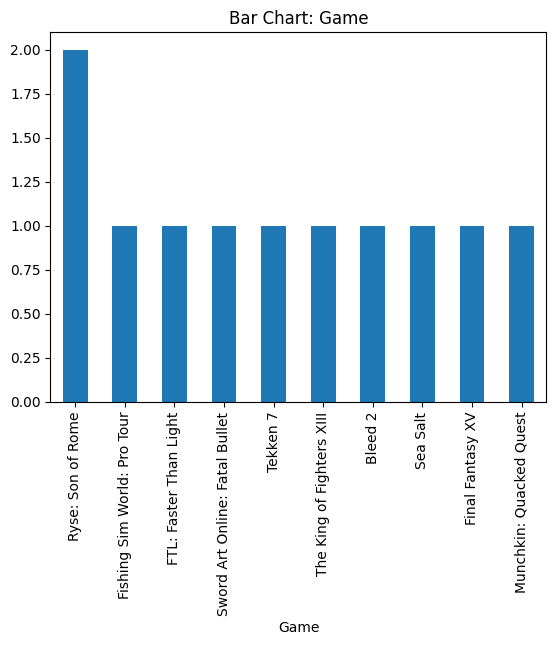

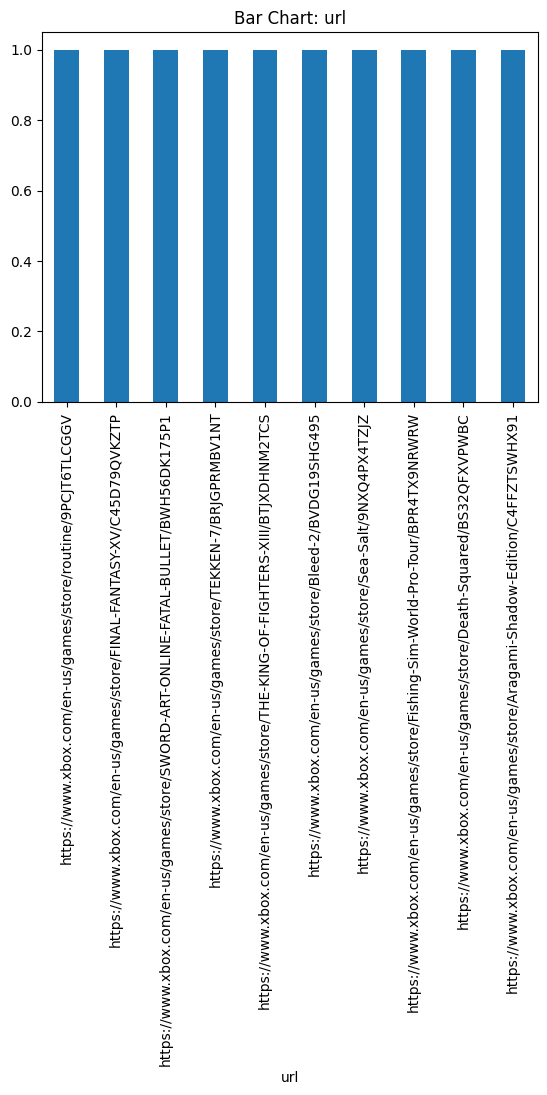

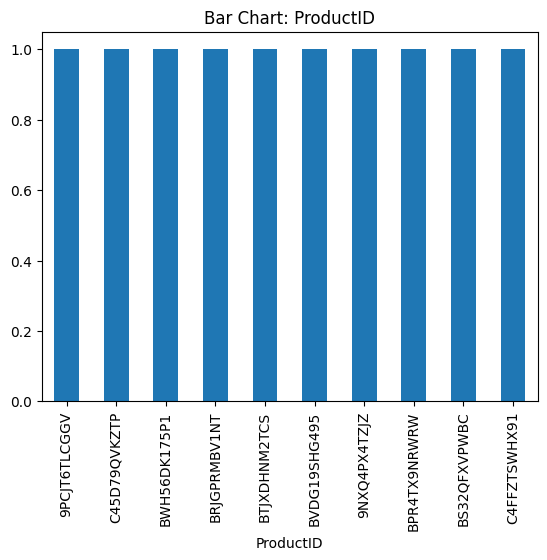

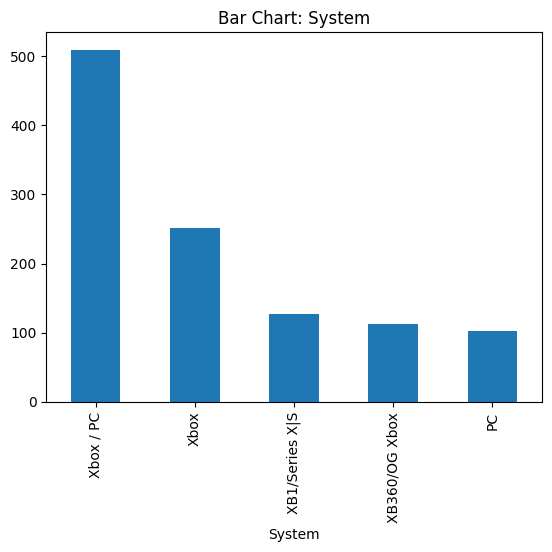

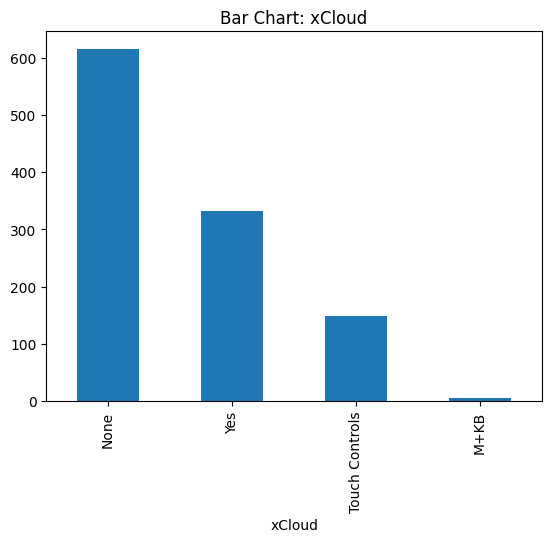

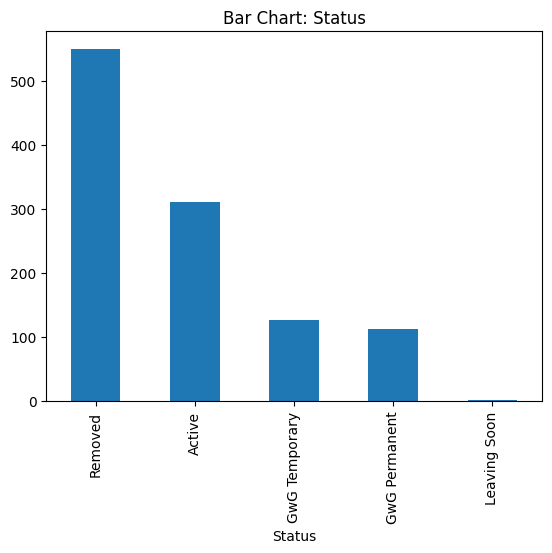

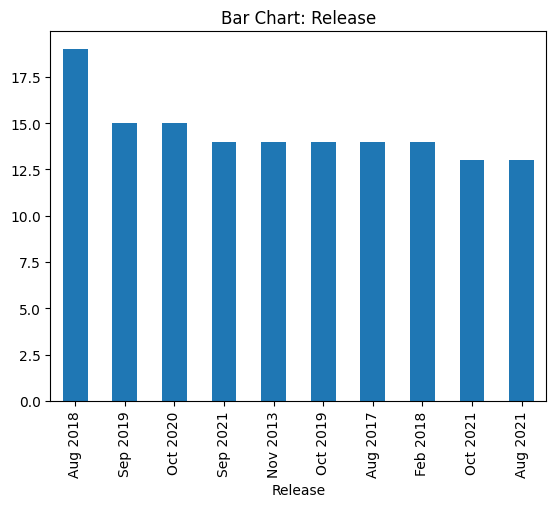

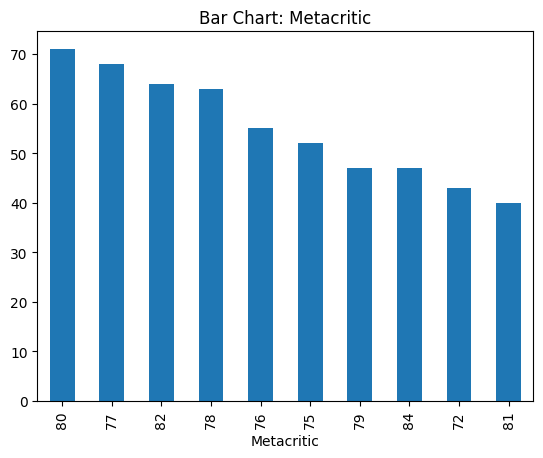

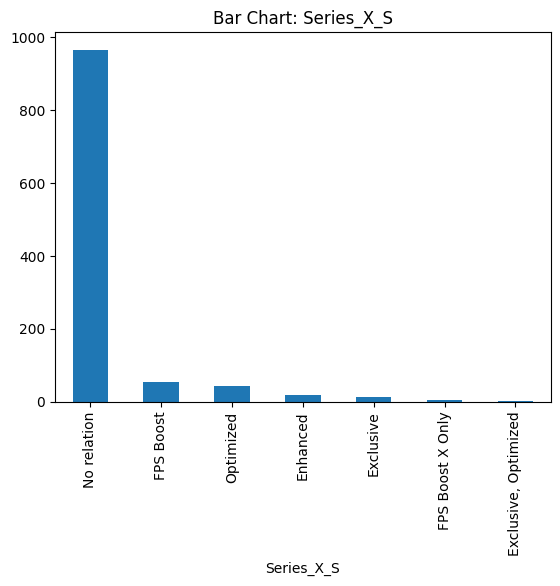

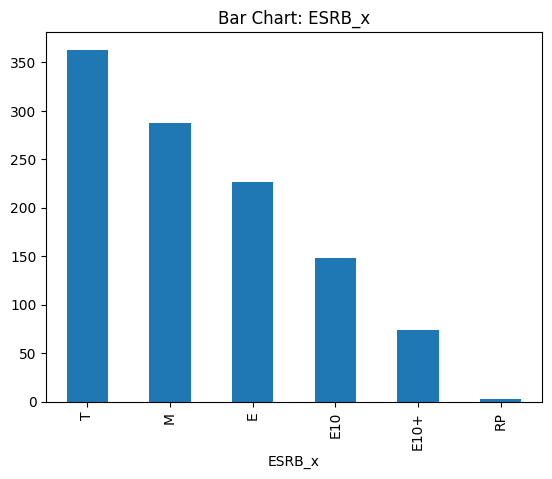

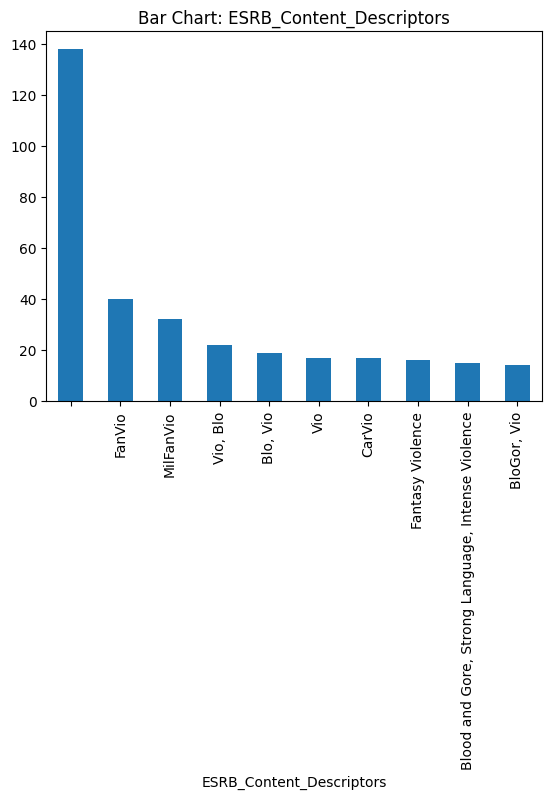

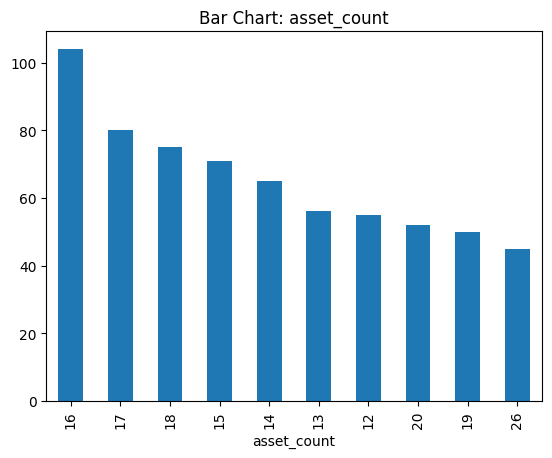

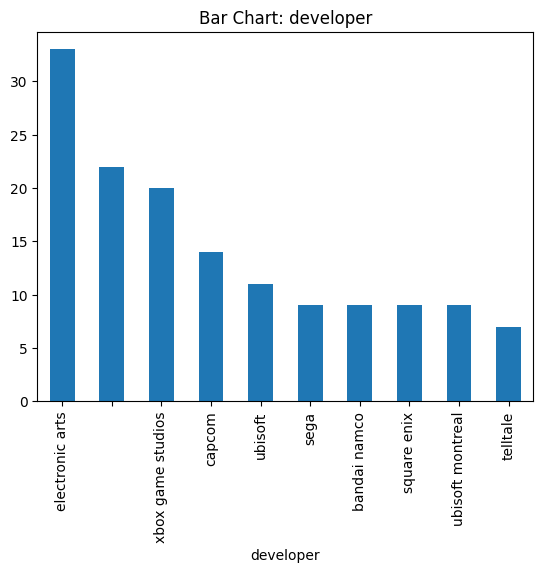

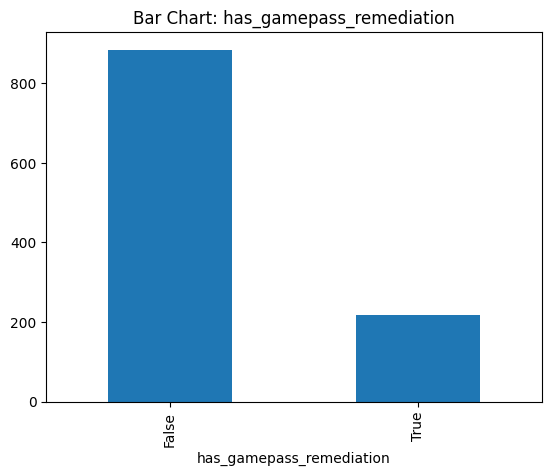

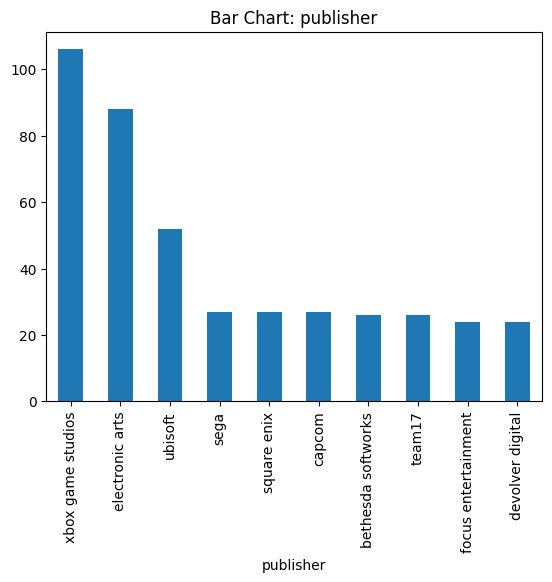

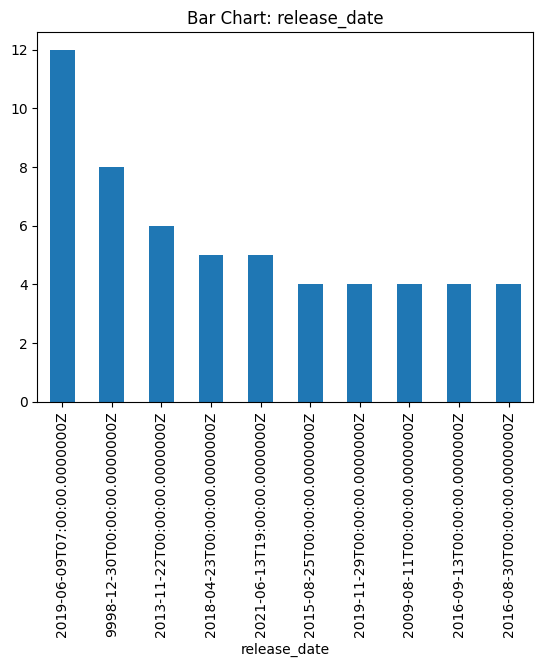

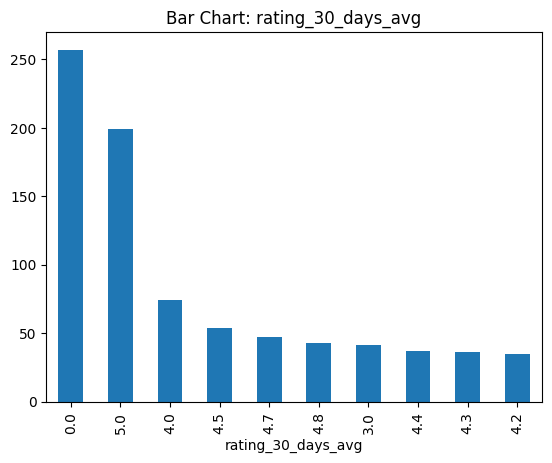

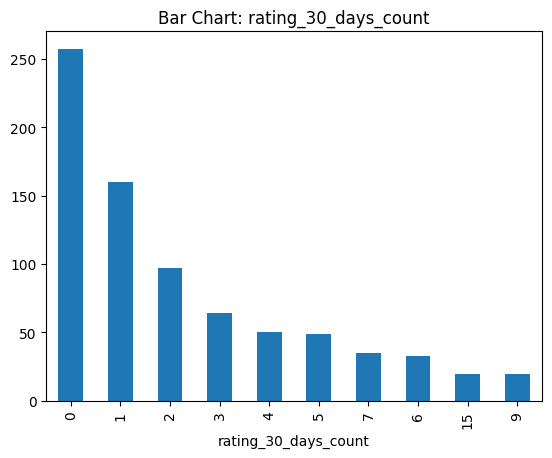

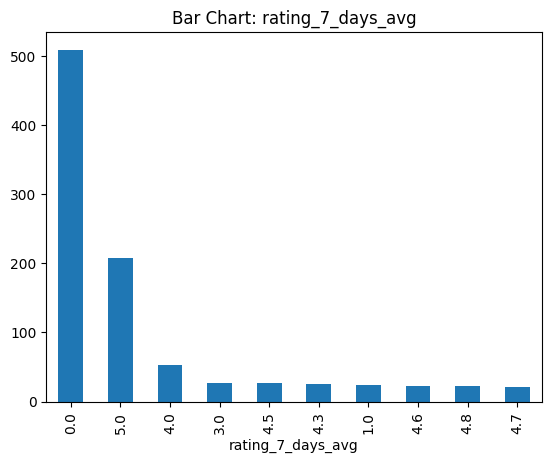

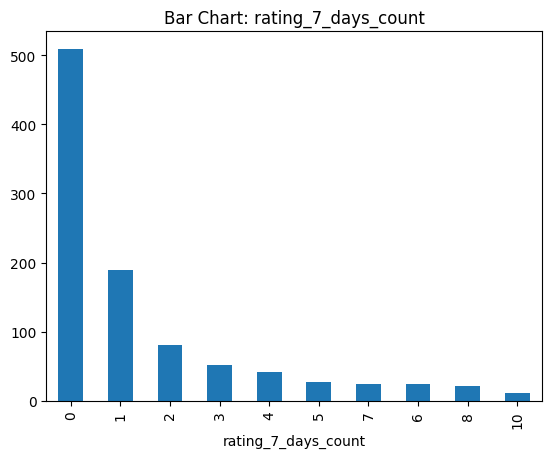

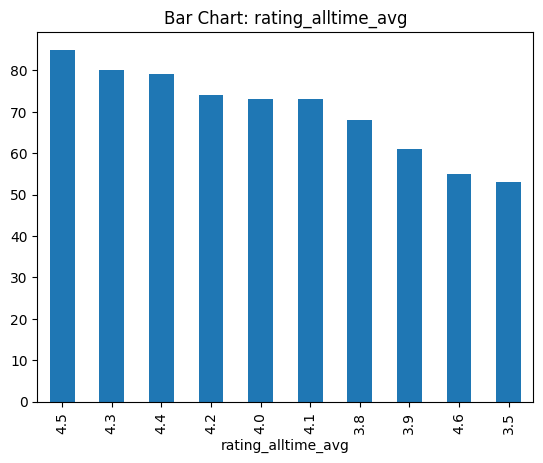

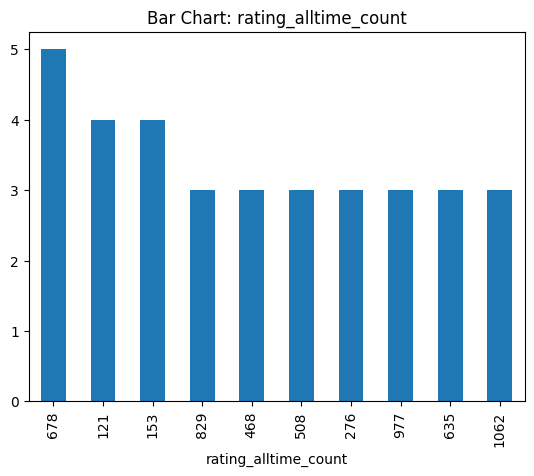

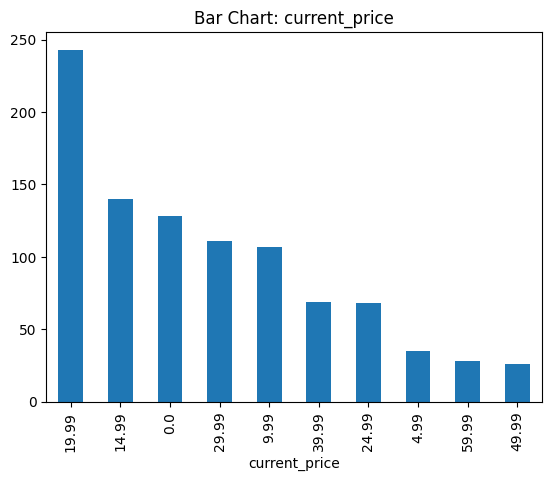

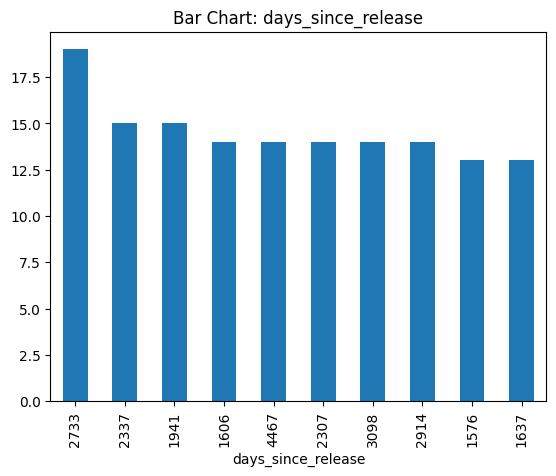

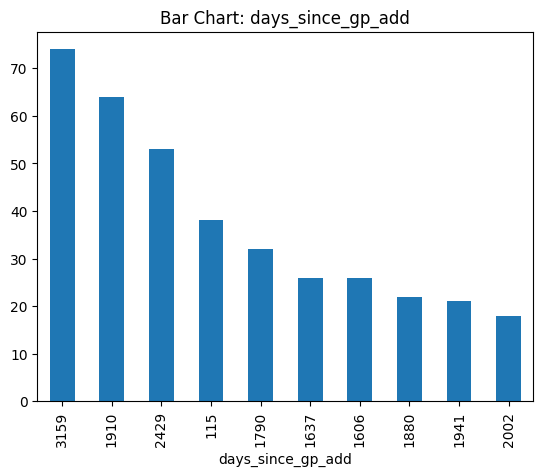

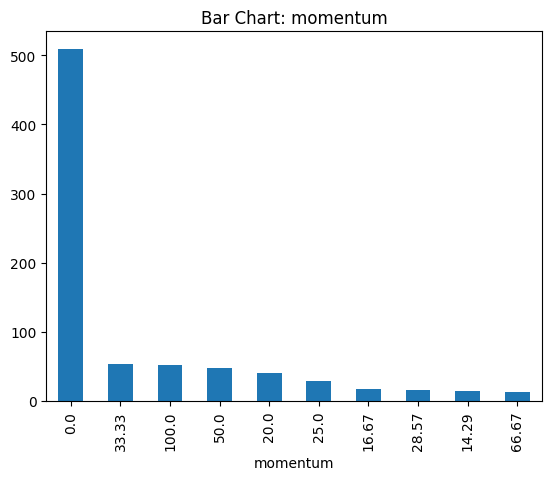

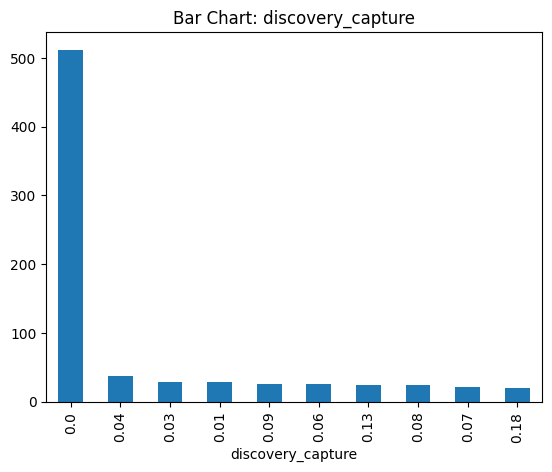

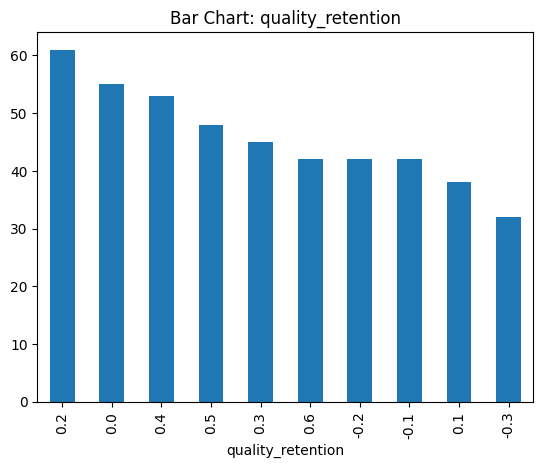

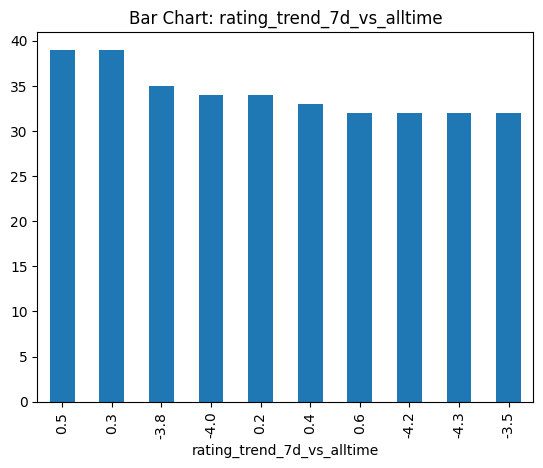

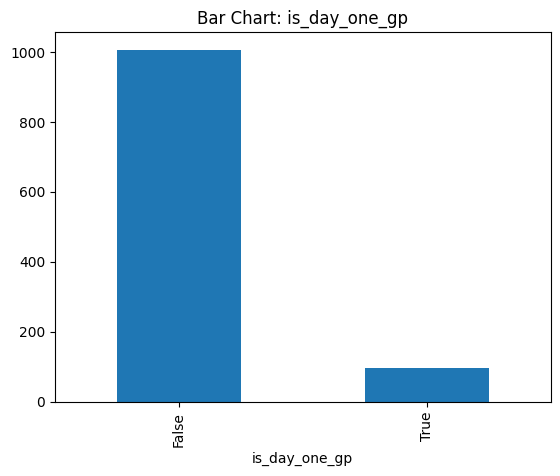

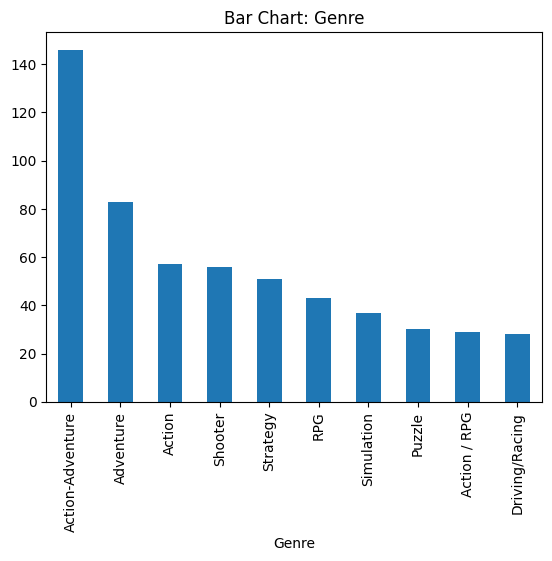

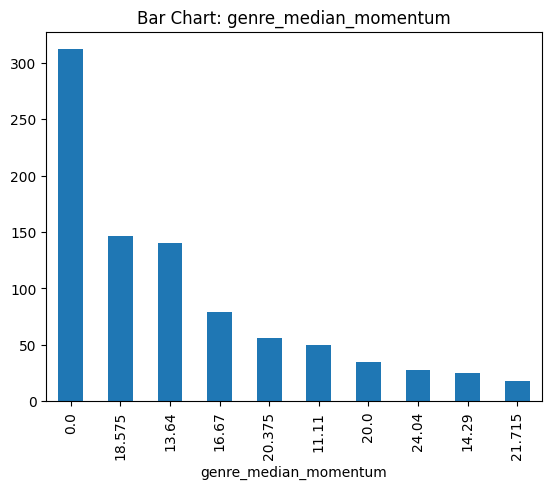

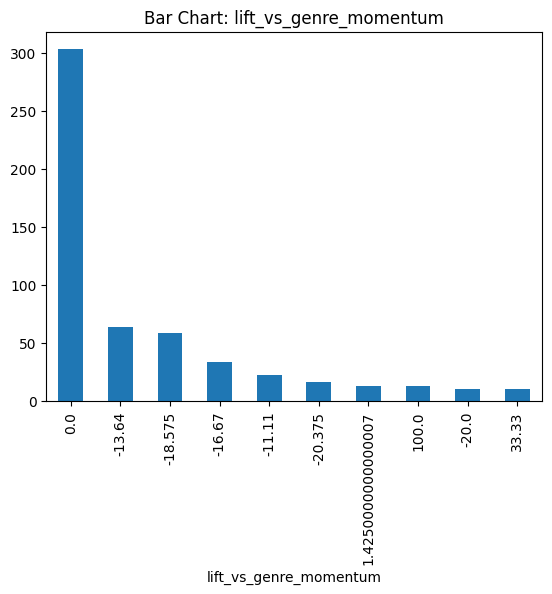

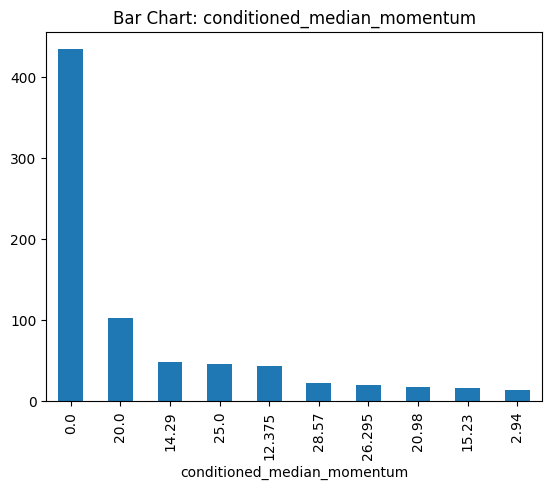

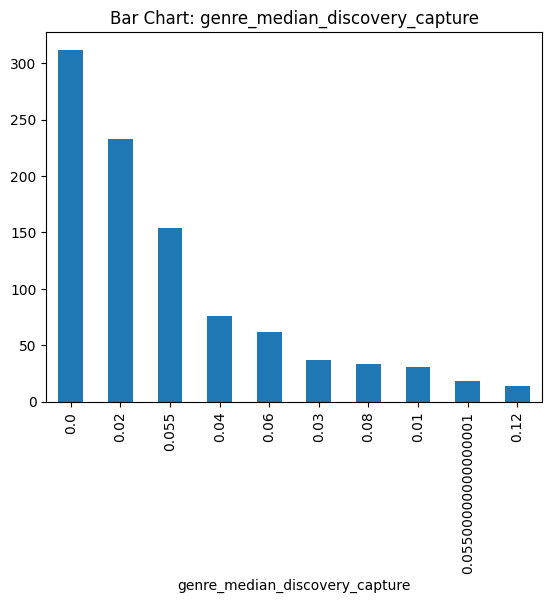

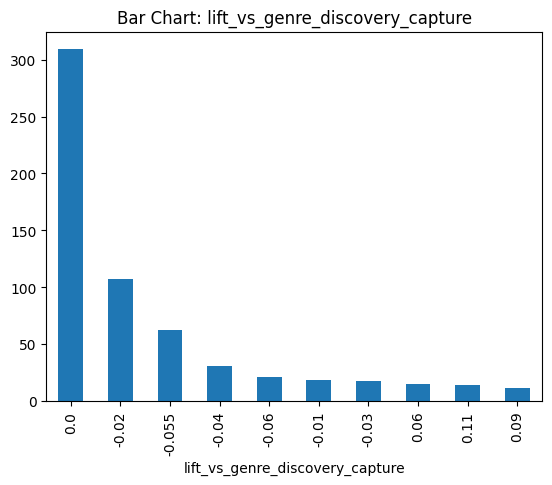

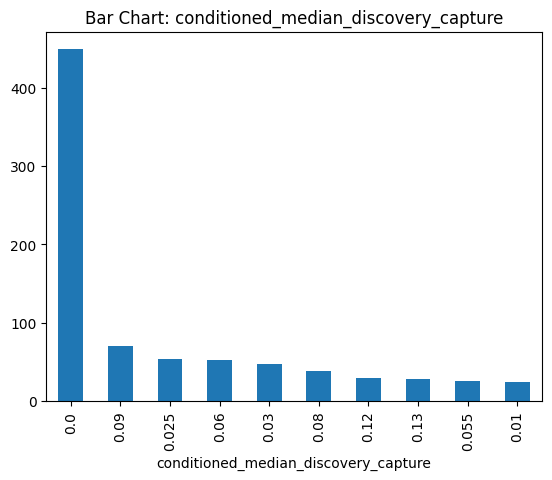

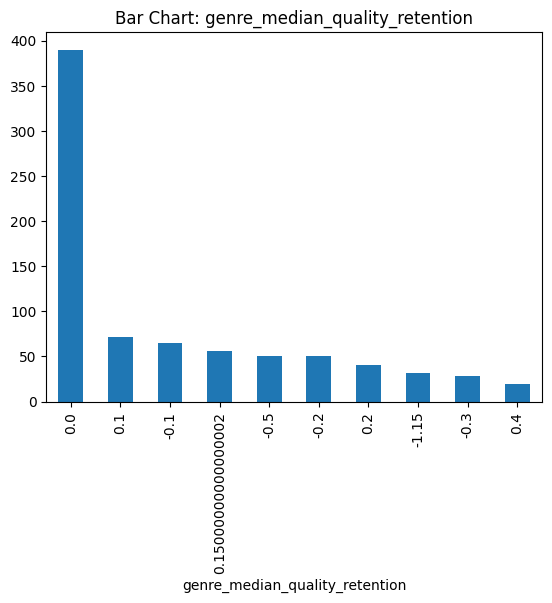

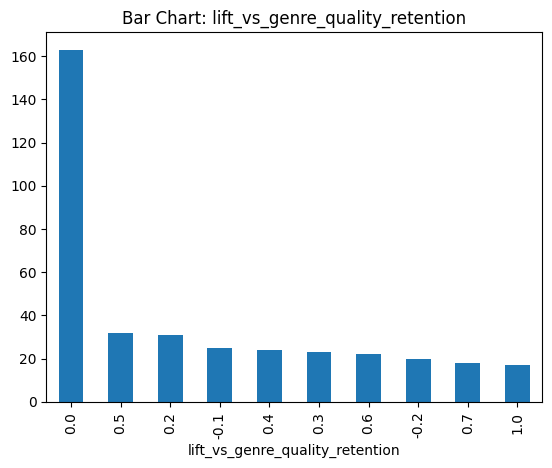

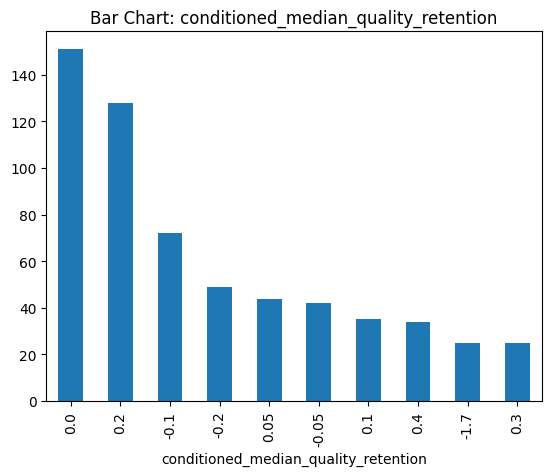

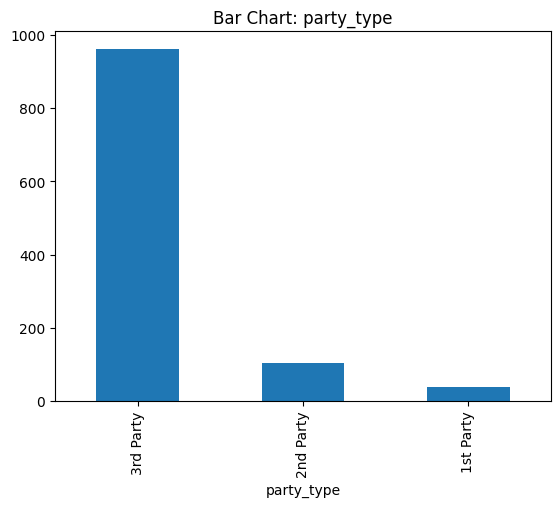

In [22]:
for col in final_df.columns:
    plt.figure()
    final_df[col].dtype == 'object' or final_df[col].nunique() < 10
    final_df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Bar Chart: {col}')
    

In [15]:
final_df['current_price'] = (
    final_df['current_price']
    .astype(str)
    .str.extract(r'(\d+\.\d+|\d+)')
    .astype(float)
)

In [13]:
columns_to_drop = [col for col in final_df.columns if 'PlayCount' in col]
final_df = final_df.drop(columns=columns_to_drop)

asset_count              int64
rating_7_days_avg      float64
rating_7_days_count      int64
current_price          float64
days_since_release       int64
days_since_gp_add        int64
momentum               float64
discovery_capture      float64
quality_retention      float64
days_since_release       int64
Metacritic             float64
dtype: object


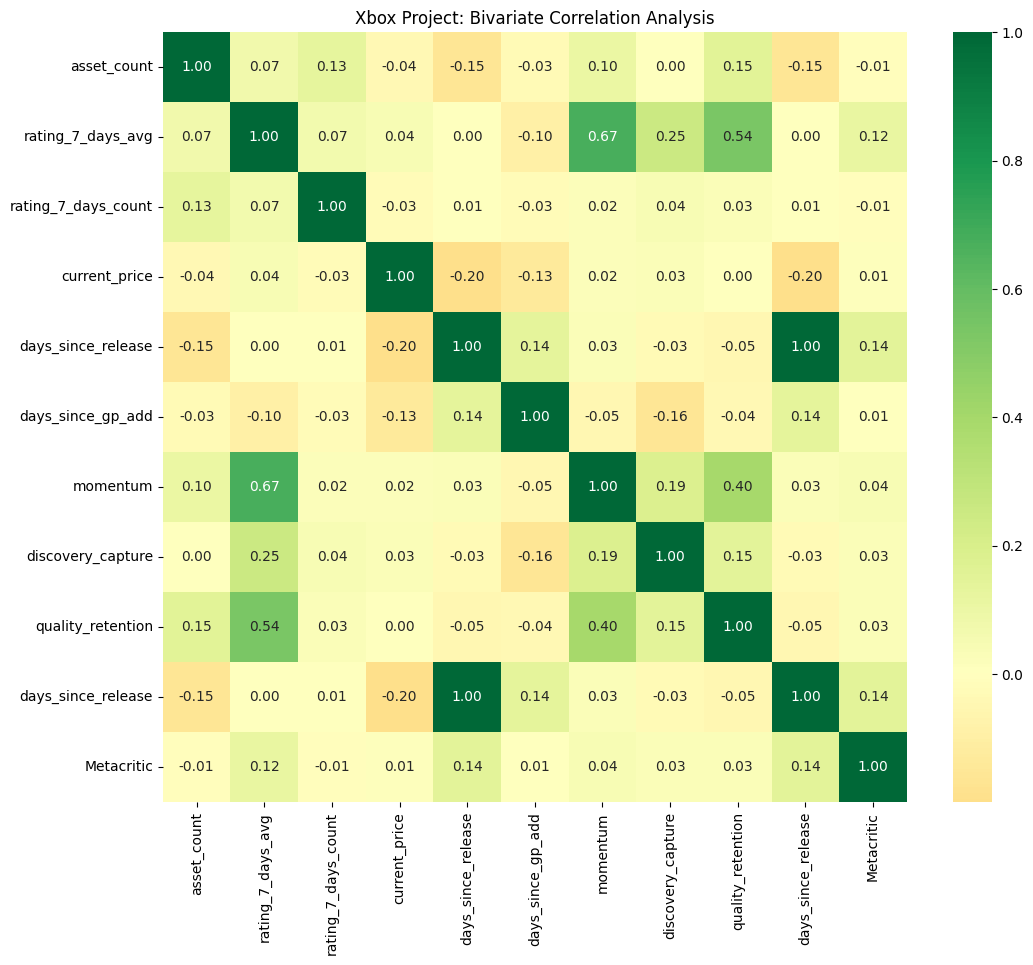

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#itereated the correlational matrix with different numerical columns to eventually get a matrix that I was happy with.
corr_cols = [
    'asset_count', 
    'rating_7_days_avg', 'rating_7_days_count',
    'current_price', 'days_since_release', 'days_since_gp_add',
    'momentum', 'discovery_capture', 'quality_retention',
    'Metacritic'
]

# 2. FORCE CLEANING: Step-by-step for the price specifically first
# This handles the '$', commas, and extra spaces in one regex sweep
final_df['current_price'] = (
    final_df['current_price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True) # Keep ONLY digits and dots
)

# 3. CONVERT ENTIRE SELECTION TO NUMERIC
# errors='coerce' is the secret—it turns " $ 89.00 " (if it failed) or "tbd" into NaN
for col in corr_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

# 4. VERIFY - If this prints anything other than 'float64', we found the culprit
print(final_df[corr_cols].dtypes)

# 5. RUN CORRELATION
corr_matrix = final_df[corr_cols].corr()

# 6. PLOT
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title('Xbox Project: Bivariate Correlation Analysis')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# 1. Split
X_train, X_test = train_test_split(final_df, test_size=0.2, random_state=42)



pipeline.fit(X_train)

This was one of the iterations of the other correlational matrixes that I tried to include with this that ultimalty did not work very well.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#itereated the correlational matrix with different numerical columns to eventually get a matrix that I was happy with.
corr_cols = [
    'asset_count', 
    'rating_7_days_avg', 'rating_7_days_count',
    'current_price', 'days_since_release', 'days_since_gp_add',
    'momentum', 'discovery_capture', 'quality_retention', 'rating_30_days_avg','rating_30_days_count'
]

# 2. FORCE CLEANING: Step-by-step for the price specifically first
# This handles the '$', commas, and extra spaces in one regex sweep
final_df['current_price'] = (
    final_df['current_price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True) # Keep ONLY digits and dots
)

# 3. CONVERT ENTIRE SELECTION TO NUMERIC
# errors='coerce' is the secret—it turns " $ 89.00 " (if it failed) or "tbd" into NaN
for col in corr_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

# 4. VERIFY - If this prints anything other than 'float64', we found the culprit
print(final_df[corr_cols].dtypes)

# 5. RUN CORRELATION
corr_matrix = final_df[corr_cols].corr()

# 6. PLOT
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title('Xbox Project: Bivariate Correlation Analysis')
plt.show()

In [ ]:
numerical_cols_final = [
    'asset_count', 
    'rating_7_days_avg', 'rating_7_days_count',
    'current_price', 'days_since_release', 'days_since_gp_add',
    'momentum', 'discovery_capture', 'quality_retention','Metacritic'
]

In [19]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the columns we suspect are highly correlated
feature_candidates = [
    'Metacritic', 'momentum', 'lift_vs_genre_momentum', 
    'discovery_capture', 'lift_vs_genre_discovery_capture', 
    'quality_retention', 'lift_vs_genre_quality_retention',
    'rating_alltime_avg', 'rating_alltime_count', 'current_price', 
    'days_since_release', 'days_since_gp_add'
]

# 2. Preparation: Force numeric (coerce strings like ' $ 89.00 ' to NaN)
df_trial = final_df_csv[feature_candidates].copy()
for col in feature_candidates:
    df_trial[col] = pd.to_numeric(df_trial[col], errors='coerce')

# 3. Impute the gaps (Metacritic, etc.)
# We scale first because KNN depends on distance
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

df_scaled = pd.DataFrame(scaler.fit_transform(df_trial), columns=feature_candidates)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=feature_candidates)

# 4. Generate the "Truth" Correlation Matrix
trial_corr = df_imputed.corr()

# 5. Visualize the Redundancy
plt.figure(figsize=(12, 10))
sns.heatmap(trial_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Redundancy Check: Trial Pipeline Correlation")
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:

sns.pairplot(final_df_csv, 
             vars=['Metacritic', 'momentum', 'discovery_capture', 'quality_retention'],
             hue='party_type', # Colors by 1st party vs 3rd party
             diag_kind='kde',
             plot_kws={'alpha': 0.6})

plt.suptitle('Discovery vs. Quality: Xbox Project Insights', y=1.02)
plt.savefig('xbox_pairplot.png')

In [51]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test = train_test_split(final_df, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")
print(f"Train-Test Split: {len(X_train) / len(final_df):.1%} train / {len(X_test) / len(final_df):.1%} test")


Training set size: 881 rows
Test set size: 221 rows
Train-Test Split: 79.9% train / 20.1% test


## Cramér's V Test for Categorical Variables

Test for associations between categorical variables to understand multicollinearity and feature relationships.


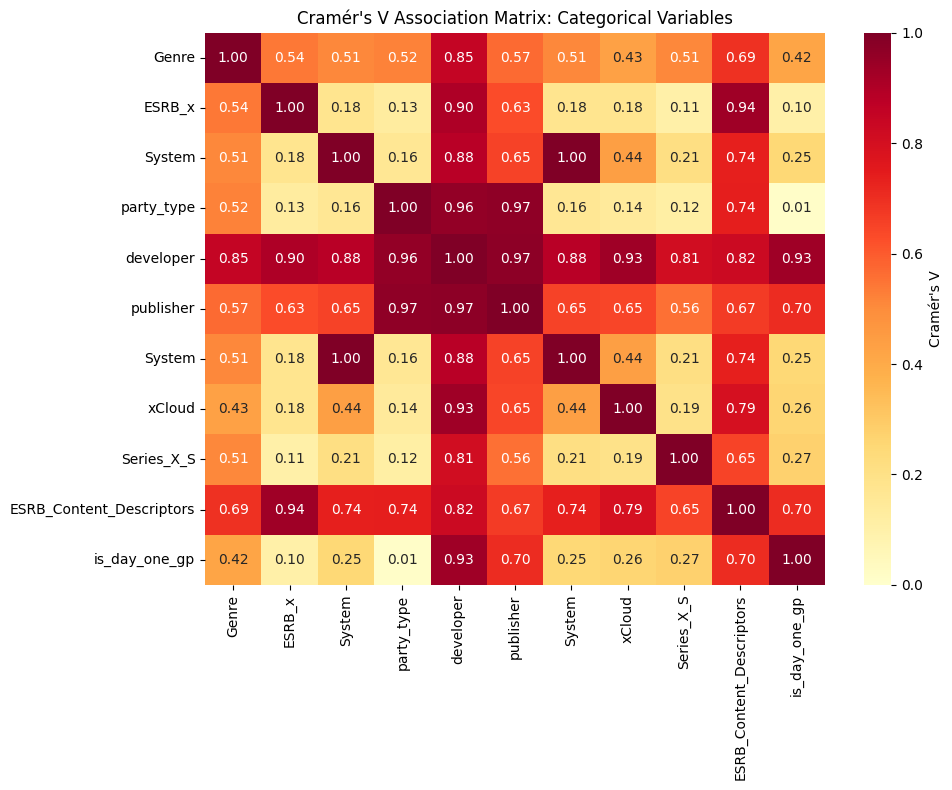


Cramér's V Matrix:
                          Genre  ESRB_x  System  party_type  developer  \
Genre                     1.000   0.543   0.510       0.521      0.848   
ESRB_x                    0.543   1.000   0.177       0.133      0.905   
System                    0.510   0.177   1.000       0.161      0.881   
party_type                0.521   0.133   0.161       1.000      0.958   
developer                 0.848   0.905   0.881       0.958      1.000   
publisher                 0.569   0.631   0.653       0.966      0.971   
System                    0.510   0.177   1.000       0.161      0.881   
xCloud                    0.432   0.177   0.440       0.143      0.934   
Series_X_S                0.508   0.105   0.213       0.116      0.812   
ESRB_Content_Descriptors  0.695   0.935   0.736       0.742      0.824   
is_day_one_gp             0.420   0.102   0.253       0.014      0.935   

                          publisher  System  xCloud  Series_X_S  \
Genre                   

In [29]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Calculate Cramér's V statistic for categorical association.
    Returns value between 0 and 1, where 0 = no association, 1 = perfect association
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

# Define categorical columns for analysis
categorical_cols = ['Genre', 'ESRB_x', 'System', 'party_type', 'developer', 'publisher', 'System', 'xCloud', 'Series_X_S','ESRB_Content_Descriptors', 'is_day_one_gp',]

# Calculate Cramér's V matrix for categorical variables
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))), 
                                index=categorical_cols, 
                                columns=categorical_cols)

for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i == j:
            cramers_v_matrix.iloc[i, j] = 1.0
        else:
            # Clean the data for Cramér's V calculation
            valid_idx = X_train[[col1, col2]].notna().all(axis=1)
            cramers_v_matrix.iloc[i, j] = cramers_v(
                X_train.loc[valid_idx, col1], 
                X_train.loc[valid_idx, col2]
            )

# Visualize the Cramér's V matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': "Cramér's V"}, vmin=0, vmax=1)
plt.title("Cramér's V Association Matrix: Categorical Variables")
plt.tight_layout()
plt.show()

print("\nCramér's V Matrix:")
print(cramers_v_matrix.round(3))
print("\nInterpretation: Values > 0.5 suggest strong categorical associations (potential multicollinearity)")


From CRAMER's V awe an essentially see that we are fucked so instead what I will try to do is to encode these columsn to make them numerical in ordeer to reduce the correlaation between each other and this will be done with a few types of encoding the 1st of which is a weighted mean of the all time scores as a way of bayesian target encoding for those with high cardinlaity. In adittion I will be adding one hot encoding for the ones with low cardinality and adding frequncy encoding to all of them and experimenting wiht them to see which of them has the lowes variance in the groups 

In [52]:
from sklearn.impute import KNNImputer

# 1. Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# 2. Select the numerical columns that help 'predict' Metacritic
# Including price and momentum helps the imputer find better neighbors
num_cols_for_impute = [
    'asset_count', 'current_price', 'momentum', 
    'quality_retention', 'Metacritic'
]

# 3. Fit and Transform the training set
# This fills the 25 missing scores based ONLY on the 881 training rows
X_train[num_cols_for_impute] = imputer.fit_transform(X_train[num_cols_for_impute])

# 4. Transform the test set
# This uses the 'patterns' learned from training to fill gaps in the test set
X_test[num_cols_for_impute] = imputer.transform(X_test[num_cols_for_impute])

In [53]:
print(X_train.isna().sum())


Game                                    0
url                                     0
ProductID                               0
System                                  0
xCloud                                  0
Status                                  0
Release                                 0
Metacritic                              0
Series_X_S                              0
ESRB_x                                  0
ESRB_Content_Descriptors                0
asset_count                             0
developer                               0
has_gamepass_remediation                0
publisher                               0
release_date                            0
rating_30_days_avg                      0
rating_30_days_count                    0
rating_30_days.TrialCount               0
rating_7_days_avg                       0
rating_7_days_count                     0
rating_7_days.TrialCount                0
rating_alltime_avg                      0
rating_alltime_count              

In [57]:
X_train.dtypes

Game                                     object
url                                      object
ProductID                                object
System                                   object
xCloud                                   object
Status                                   object
Release                                  object
Metacritic                              float64
Series_X_S                               object
ESRB_x                                   object
ESRB_Content_Descriptors                 object
asset_count                             float64
developer                                object
has_gamepass_remediation                   bool
publisher                                object
release_date                             object
rating_30_days_avg                      float64
rating_30_days_count                      int64
rating_30_days.TrialCount                object
rating_7_days_avg                       float64
rating_7_days_count                     

In [60]:
X_train_preprocessed

array([[-0.17322348, -1.0148598 , -0.07377772, ..., -1.20095286,
         0.02921314,  0.88704342],
       [ 0.71330699, -1.0148598 , -0.07377772, ...,  1.7599087 ,
         0.45668147,  0.87876044],
       [ 2.99295678,  0.93740414, -0.0479882 , ...,  1.7599087 ,
         2.11166367,  0.65884702],
       ...,
       [-0.4265179 , -1.0148598 , -0.07377772, ..., -0.46787647,
         0.57930974,  0.75834779],
       [ 0.8399542 ,  0.34718481, -0.06518121, ...,  1.7599087 ,
        -1.32651038,  0.38967534],
       [ 1.09324862,  1.25521455, -0.06518121, ..., -1.06231769,
        -0.91356066, -0.52860852]], shape=(881, 35))

In [61]:
# 1. Get the list of feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# 2. Convert the array back to a DataFrame using those names
X_train_processed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# 3. View the first few rows to confirm it worked!
print(X_train_processed_df.head())

   num__asset_count  num__rating_7_days_avg  num__rating_7_days_count  \
0         -0.173223               -1.014860                 -0.073778   
1          0.713307               -1.014860                 -0.073778   
2          2.992957                0.937404                 -0.047988   
3         -0.426518               -1.014860                 -0.073778   
4         -0.299871                1.255215                 -0.065181   

   num__current_price  num__days_since_release  num__days_since_gp_add  \
0           -0.232844                -0.724455                0.191253   
1           -0.745440                 0.035091                0.475672   
2           -0.660007                -0.188002                1.252308   
3           -0.232844                 1.041801                1.323122   
4            0.407900                -1.627141               -2.246619   

   num__momentum  num__discovery_capture  num__quality_retention  \
0      -0.779151               -0.318077        

In [37]:
final_df['current_price'].value_counts()

current_price
19.99     243
14.99     140
0.00      128
29.99     111
9.99      107
39.99      69
24.99      68
4.99       35
59.99      28
49.99      26
3.74       10
7.99        9
11.99       9
15.99       8
34.99       8
16.99       8
7.49        8
2.99        8
3.99        7
2.49        7
12.99       6
69.99       4
6.59        4
1.99        3
17.99       3
6.99        3
44.99       2
399.99      2
4.49        2
18.99       2
21.99       2
2.24        2
20.99       2
10.99       2
12.49       2
14.49       1
22.99       1
49.49       1
89.99       1
6.49        1
2.29        1
31.95       1
5.49        1
48.49       1
1.49        1
8.74        1
13.99       1
6.24        1
19.49       1
34.49       1
13.19       1
54.99       1
21.49       1
79.99       1
109.99      1
119.99      1
0.99        1
8.99        1
199.99      1
Name: count, dtype: int64

## ML Pipeline: Categorical & Numerical Feature Engineering

Separate preprocessing pipelines for categorical and numerical features with appropriate transformations.


In [ ]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer

# 1. Define your column groups
low_card_cols = ['System', 'xCloud', 'Series_X_S', 'is_day_one_gp', 'party_type']
high_card_cols = ['developer', 'publisher', 'Genre', 'ESRB_Content_Descriptors']
num_cols = [
    'asset_count', 'rating_7_days_avg', 'rating_7_days_count',
    'current_price', 'days_since_release', 'days_since_gp_add',
    'momentum', 'discovery_capture', 'quality_retention', 'Metacritic'
]

# 2. Build the Hybrid High-Cardinality Pipeline
# This applies BOTH Target and Frequency encoding to the same columns
high_card_pipe = Pipeline([
    ('target_enc', ce.TargetEncoder(smoothing=10, handle_missing='value')), # Weighted Mean
    ('freq_enc', ce.CountEncoder(normalize=True)),                        # Frequency
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())                                          # Scaling is vital for KNN!
])

# 3. Build the Low-Cardinality Pipeline
low_card_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('scaler', StandardScaler())
])

# 4. Build the Numerical Pipeline
num_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

# 5. Combine everything into the final preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('low_card', low_card_pipe, low_card_cols),
        ('high_card', high_card_pipe, high_card_cols)
    ],
    remainder='drop' # Drops IDs, URLs, and Names to prevent overfitting
)

# 6. Usage (Fit on Training only to avoid leakage)
# We use 'Metacritic' as the target for the TargetEncoder to create 'Pedigree'
X_train_preprocessed = preprocessor.fit_transform(X_train, y=X_train['rating_alltime_avg'])
X_test_preprocessed = preprocessor.transform(X_test)

Recheck the correlationbal matrixo

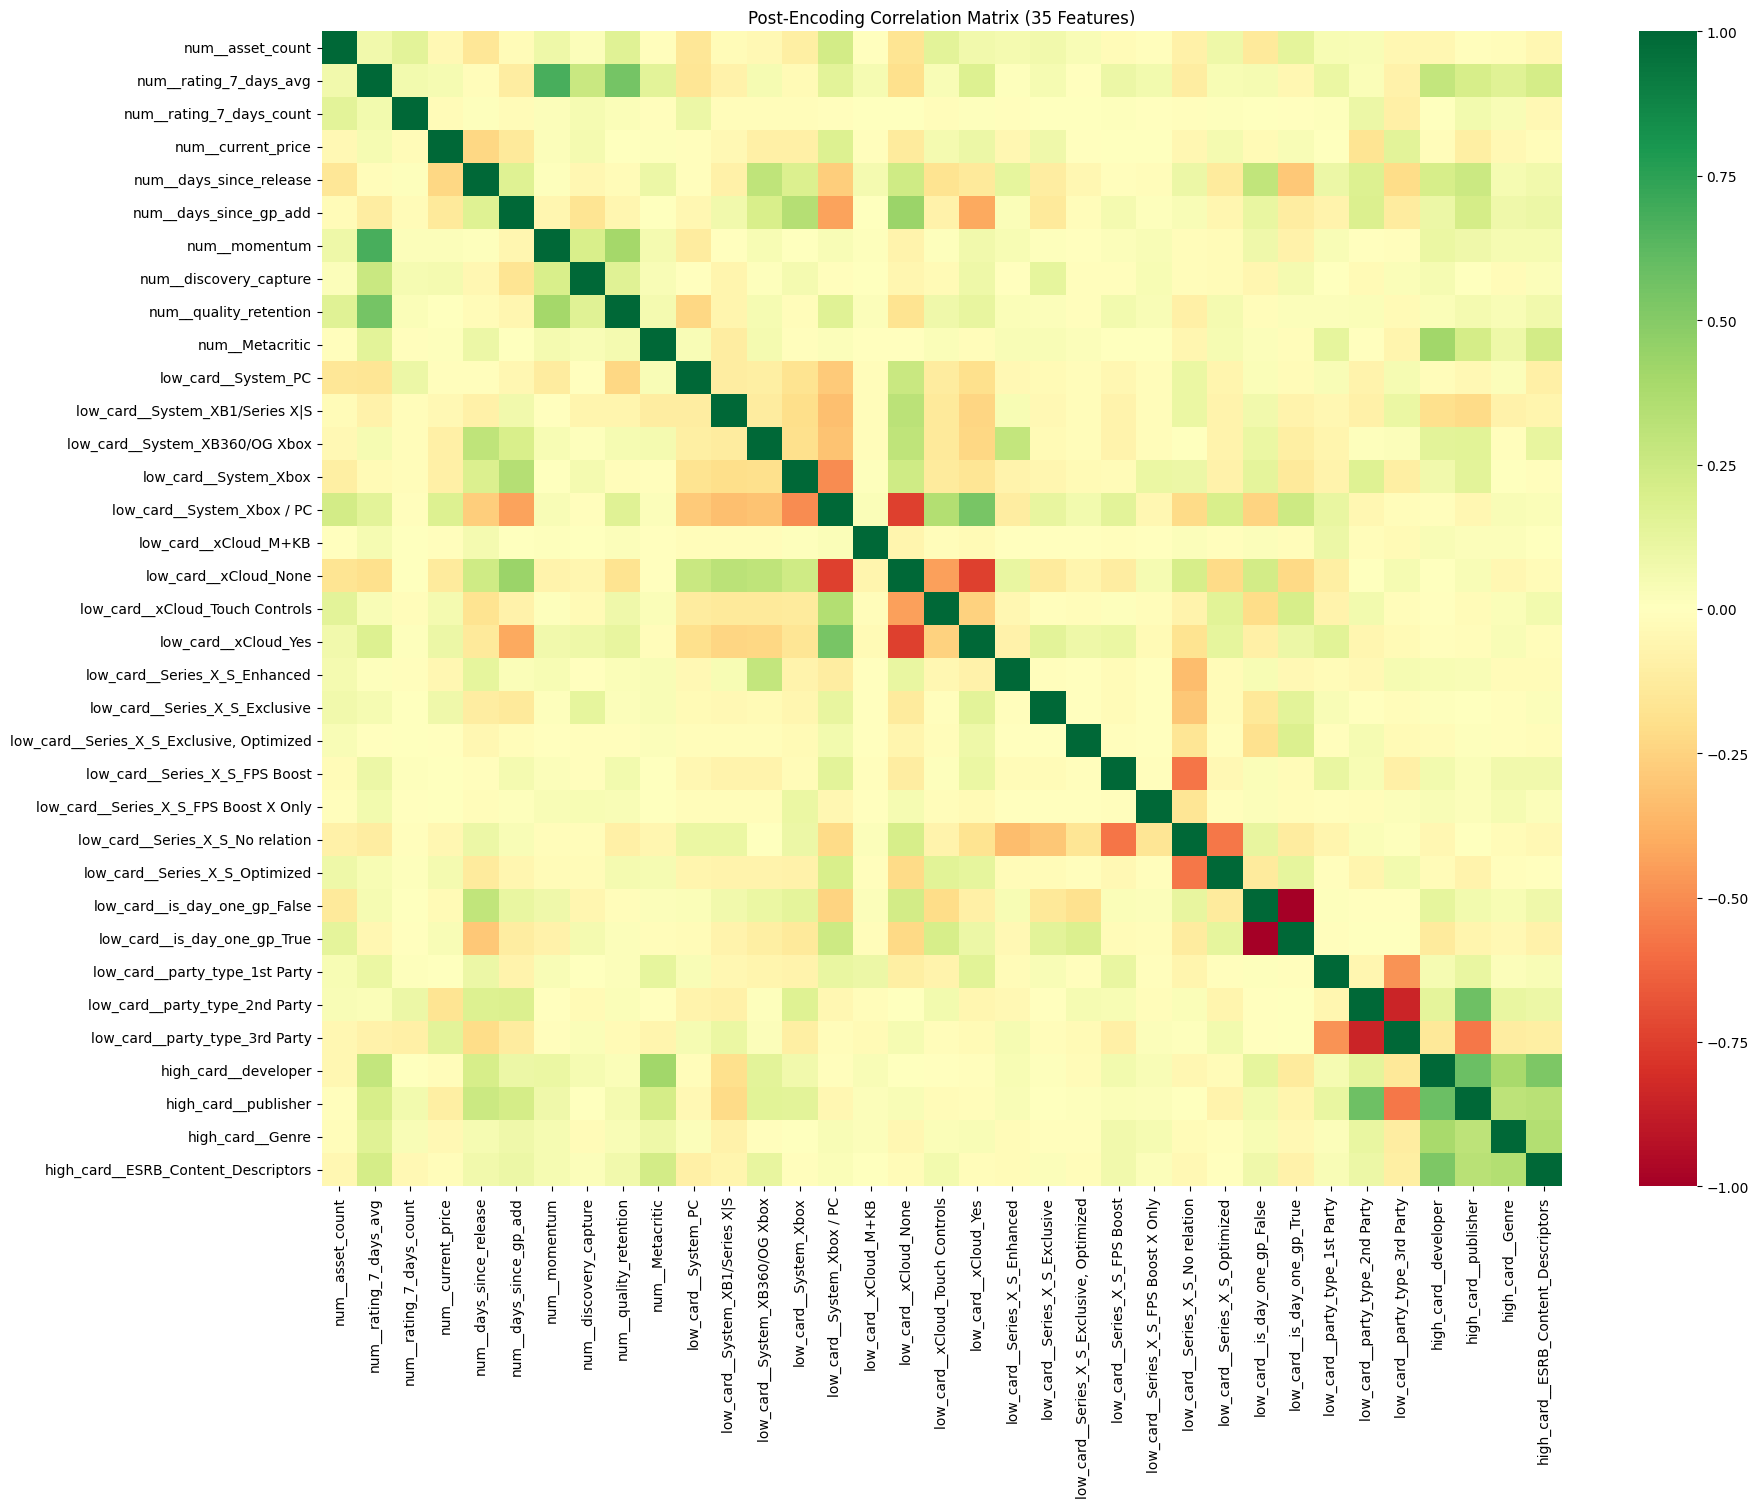

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convert array to DataFrame
feature_names = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# 2. Calculate Pearson Correlation
corr_matrix = X_processed_df.corr()

# 3. Plot the Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='RdYlGn', center=0)
plt.title("Post-Encoding Correlation Matrix (35 Features)")
plt.show()

In [63]:
# 1. Calculate the absolute correlation matrix
corr_matrix = X_processed_df.corr().abs()

# 2. Select the upper triangle (to avoid duplicate pairs like A-B and B-A)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# 4. Display the specific pairs and their values for your review
high_corr_pairs = (upper[upper > 0.85]
                  .stack()
                  .reset_index()
                  .rename(columns={0: 'correlation', 'level_0': 'Feature A', 'level_1': 'Feature B'}))

print("High Correlation Pairs (> 0.85):")
print(high_corr_pairs)

High Correlation Pairs (> 0.85):
                       Feature A                     Feature B  correlation
0  low_card__is_day_one_gp_False  low_card__is_day_one_gp_True          1.0


Looking at this it seesm that the only one that we need to be absloutey worried about is the False and the True between the False and True which is to expected considering they are complete opposites 

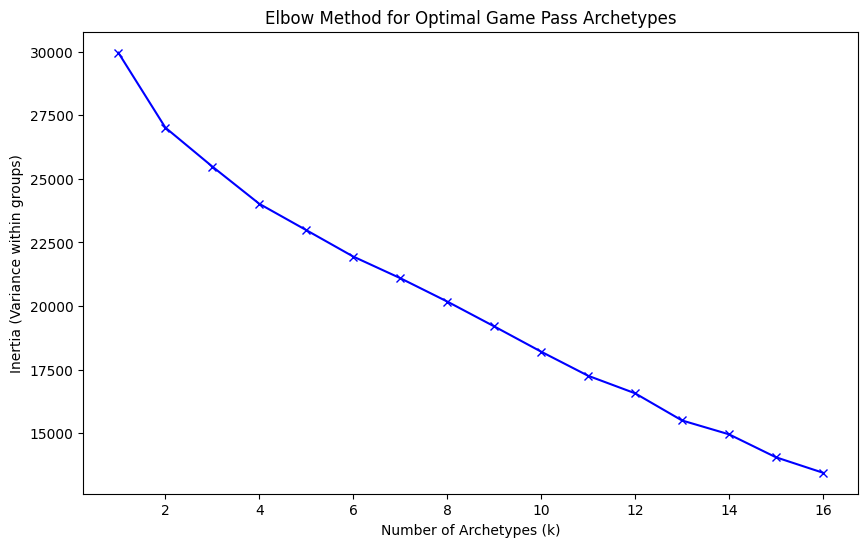

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Drop the redundant dummy variable
X_final = X_processed_df.drop(columns=['low_card__is_day_one_gp_False'])

# 2. Run the 'Elbow Method' to find the optimal number of archetypes
inertia = []
K = range(1, 17)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_final)
    inertia.append(km.inertia_)

# 3. Plot the results
plt.figure(figsize=(10,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Archetypes (k)')
plt.ylabel('Inertia (Variance within groups)')
plt.title('Elbow Method for Optimal Game Pass Archetypes')
plt.show()

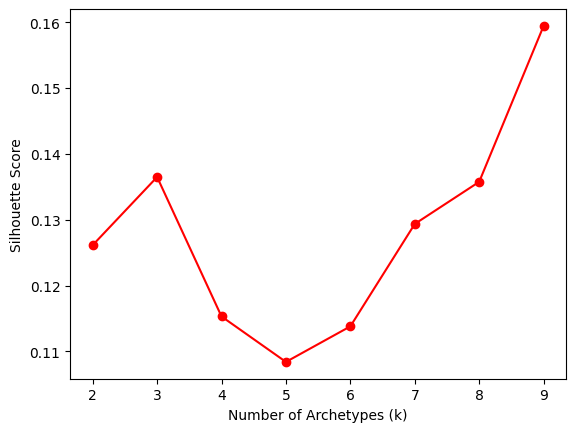

In [66]:
from sklearn.metrics import silhouette_score

# Calculate scores for different k values
s_scores = []
K_range = range(2, 10) # Silhouette isn't defined for k=1

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_final)
    s_scores.append(silhouette_score(X_final, labels))

# Plotting the Silhouette Scores
plt.plot(K_range, s_scores, 'ro-')
plt.xlabel('Number of Archetypes (k)')
plt.ylabel('Silhouette Score')
plt.show()